# Exploratory data analysis

In [1]:
!pip3 install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
from scipy.io import arff
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
data, meta = arff.loadarff('autos.arff')

In [4]:
converters = dict()
_ = [converters.update({column:dtype}) for column,dtype in zip(meta.names(),meta.types())]

In [5]:
df = pd.DataFrame(data=data, columns=meta.names())

In [6]:
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,NaN,b'alfa-romero',b'gas',b'std',b'two',b'convertible',b'rwd',b'front',88.6,168.8,...,b'mpfi',3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,b'3'
1,NaN,b'alfa-romero',b'gas',b'std',b'two',b'convertible',b'rwd',b'front',88.6,168.8,...,b'mpfi',3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,b'3'
2,NaN,b'alfa-romero',b'gas',b'std',b'two',b'hatchback',b'rwd',b'front',94.5,171.2,...,b'mpfi',2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,b'1'
3,164.0,b'audi',b'gas',b'std',b'four',b'sedan',b'fwd',b'front',99.8,176.6,...,b'mpfi',3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,b'2'
4,164.0,b'audi',b'gas',b'std',b'four',b'sedan',b'4wd',b'front',99.4,176.6,...,b'mpfi',3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,b'2'


## Dataframe overview

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null float64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             20

In [8]:
print("Number of categorical features %i" %df.select_dtypes(include=['object']).shape[1])
print("Number of numerical features %i" %df.select_dtypes(include=['float']).shape[1])

Number of categorical features 11
Number of numerical features 15


# Univariate analysis

### Getting only categorical values to inspect them

In [9]:
cat_df = df.select_dtypes(include=['object']).copy()
cat_df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,symboling
0,b'alfa-romero',b'gas',b'std',b'two',b'convertible',b'rwd',b'front',b'dohc',b'four',b'mpfi',b'3'
1,b'alfa-romero',b'gas',b'std',b'two',b'convertible',b'rwd',b'front',b'dohc',b'four',b'mpfi',b'3'
2,b'alfa-romero',b'gas',b'std',b'two',b'hatchback',b'rwd',b'front',b'ohcv',b'six',b'mpfi',b'1'
3,b'audi',b'gas',b'std',b'four',b'sedan',b'fwd',b'front',b'ohc',b'four',b'mpfi',b'2'
4,b'audi',b'gas',b'std',b'four',b'sedan',b'4wd',b'front',b'ohc',b'five',b'mpfi',b'2'


### Null-values check

In [10]:
print("Nulls found: %i " %cat_df.isnull().values.sum())

Nulls found: 0 


### Frequency distributions

Looking at the following charts, we realize that information is **not balanced** at all. 

Here we have a decision to make: **How do we deal with imbalanced data?**

In [11]:
def plot_all_cat_distributions(dataframe):
    """ Plot every single category frequency distribution in the same cell"""
    max_shape = np.ceil(dataframe.shape[1] / 2)
    fig = plt.figure(figsize=(20,40))
    for i, col in enumerate(dataframe.columns):
        plt.subplot(max_shape, 2, i+1)
        _ = sns.countplot(y = col, data = dataframe, order=dataframe[col].value_counts().index)
    plt.show()

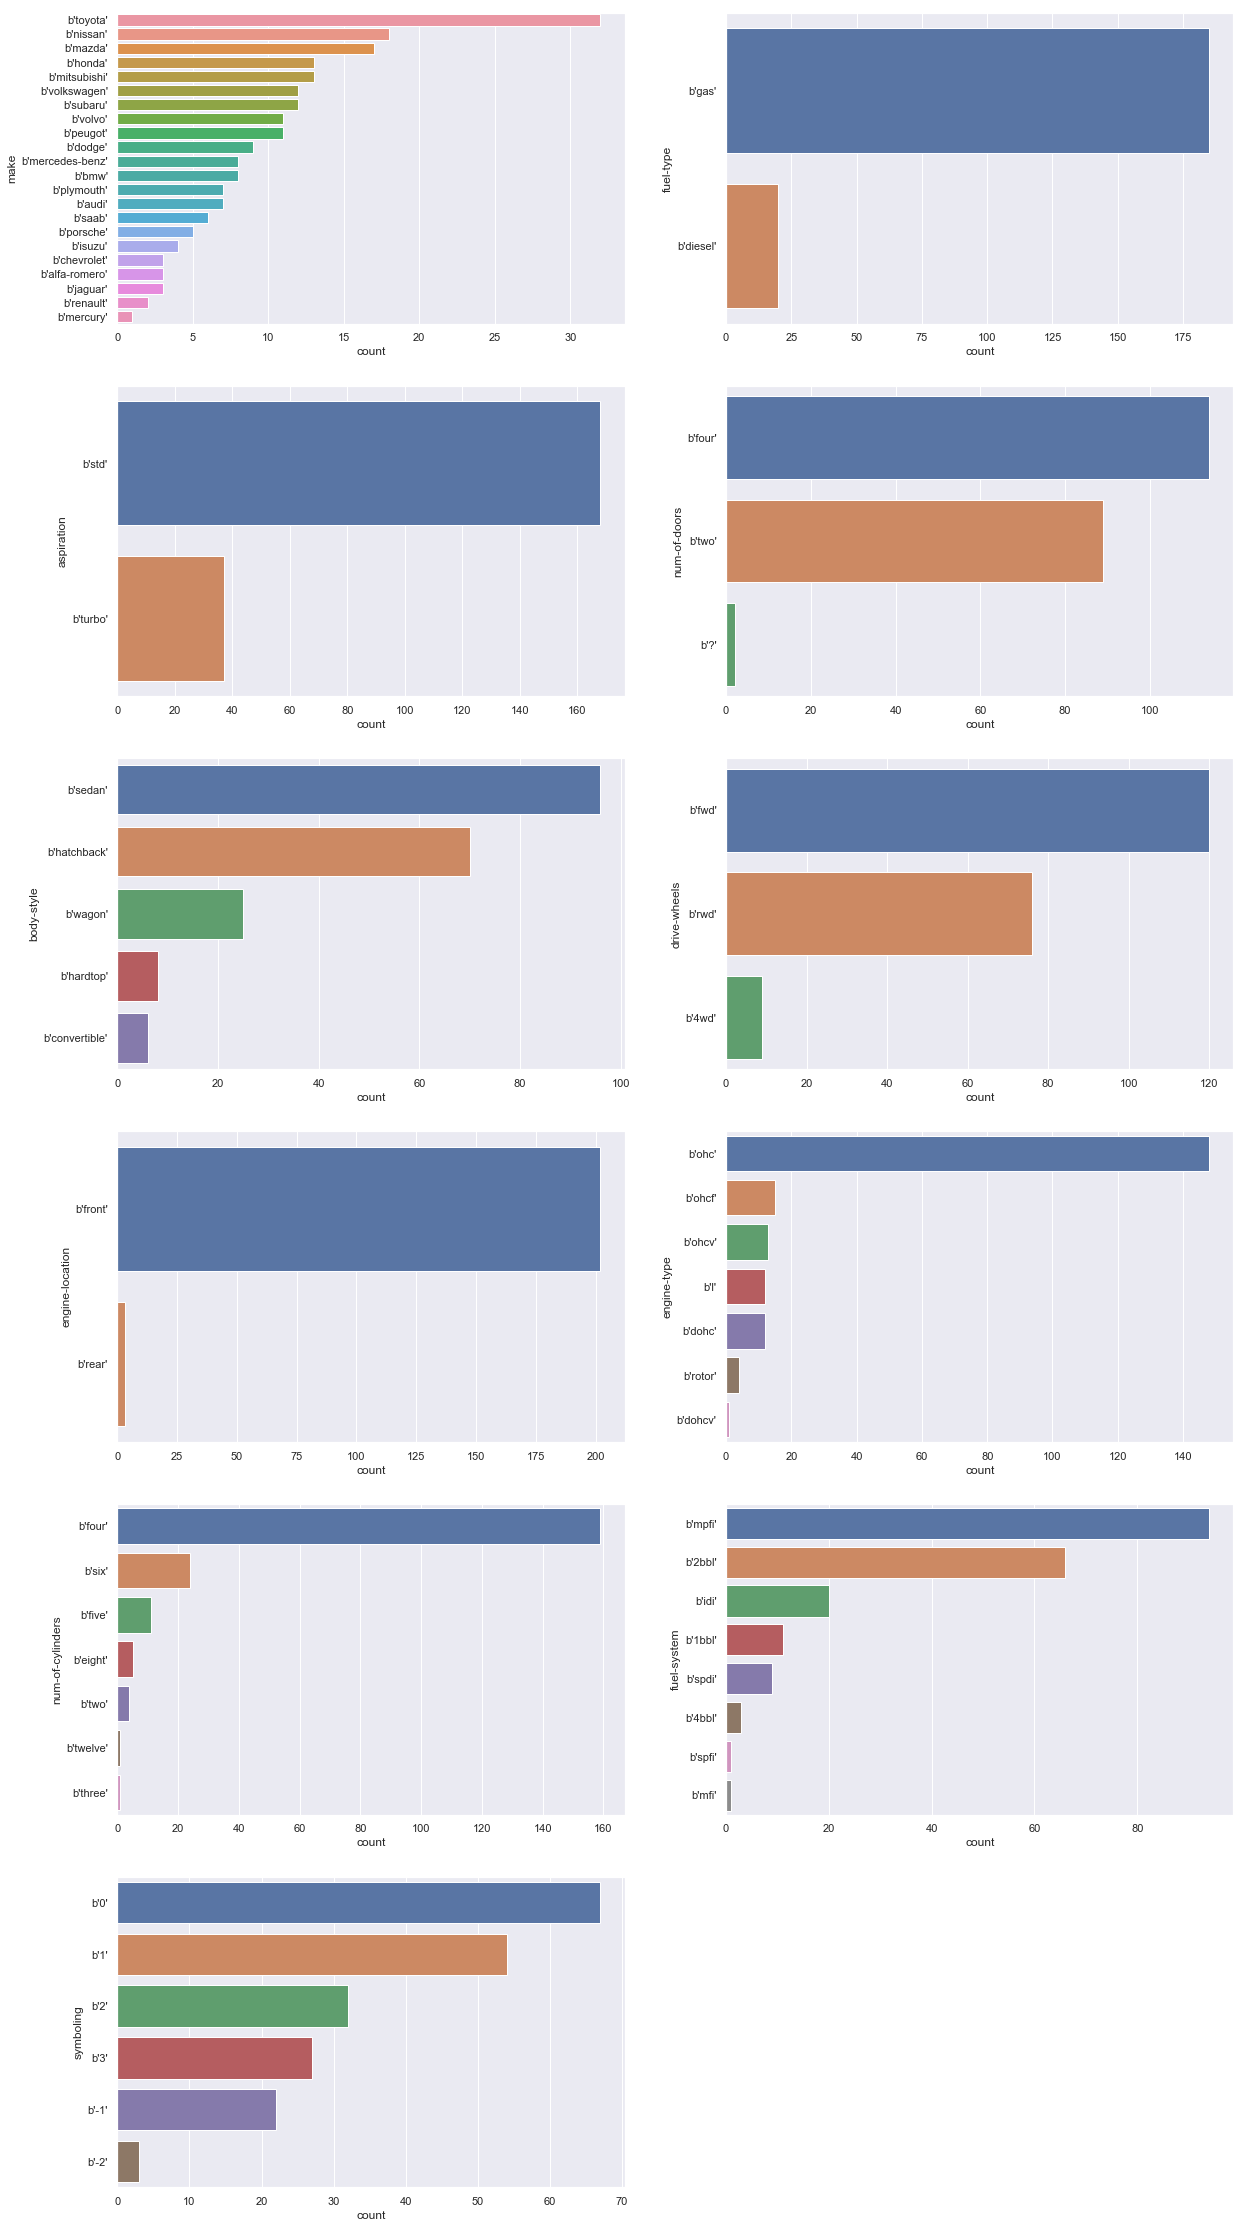

In [12]:
plot_all_cat_distributions(cat_df)

## Getting numerical features to inspect them

In [13]:
num_df = df.select_dtypes(include=['float']).copy()
num_df.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


### Null-values check

As we found null-values, there's another decision to take: **How are we dealing with null-values?**

In [14]:
print("Nulls found: %i " %num_df.isnull().values.sum())

Nulls found: 57 


### Numerical insights

Some of the most interesting plots for numerical values are *boxplots*. They give information about median, quartils, outliers... in just a single plot.

In [15]:
def plot_all_num_boxplots(dataframe):
    """ Plot every single category frequency distribution in the same cell"""
    max_shape = np.ceil(dataframe.shape[1] / 2)
    fig = plt.figure(figsize=(20,40))
    for i, col in enumerate(dataframe.columns):
        plt.subplot(max_shape, 2, i+1)
        _ = sns.boxplot(y = col, data = dataframe, palette='rainbow', order=dataframe[col].value_counts().index, orient='h', linewidth=2.5)
    plt.show()

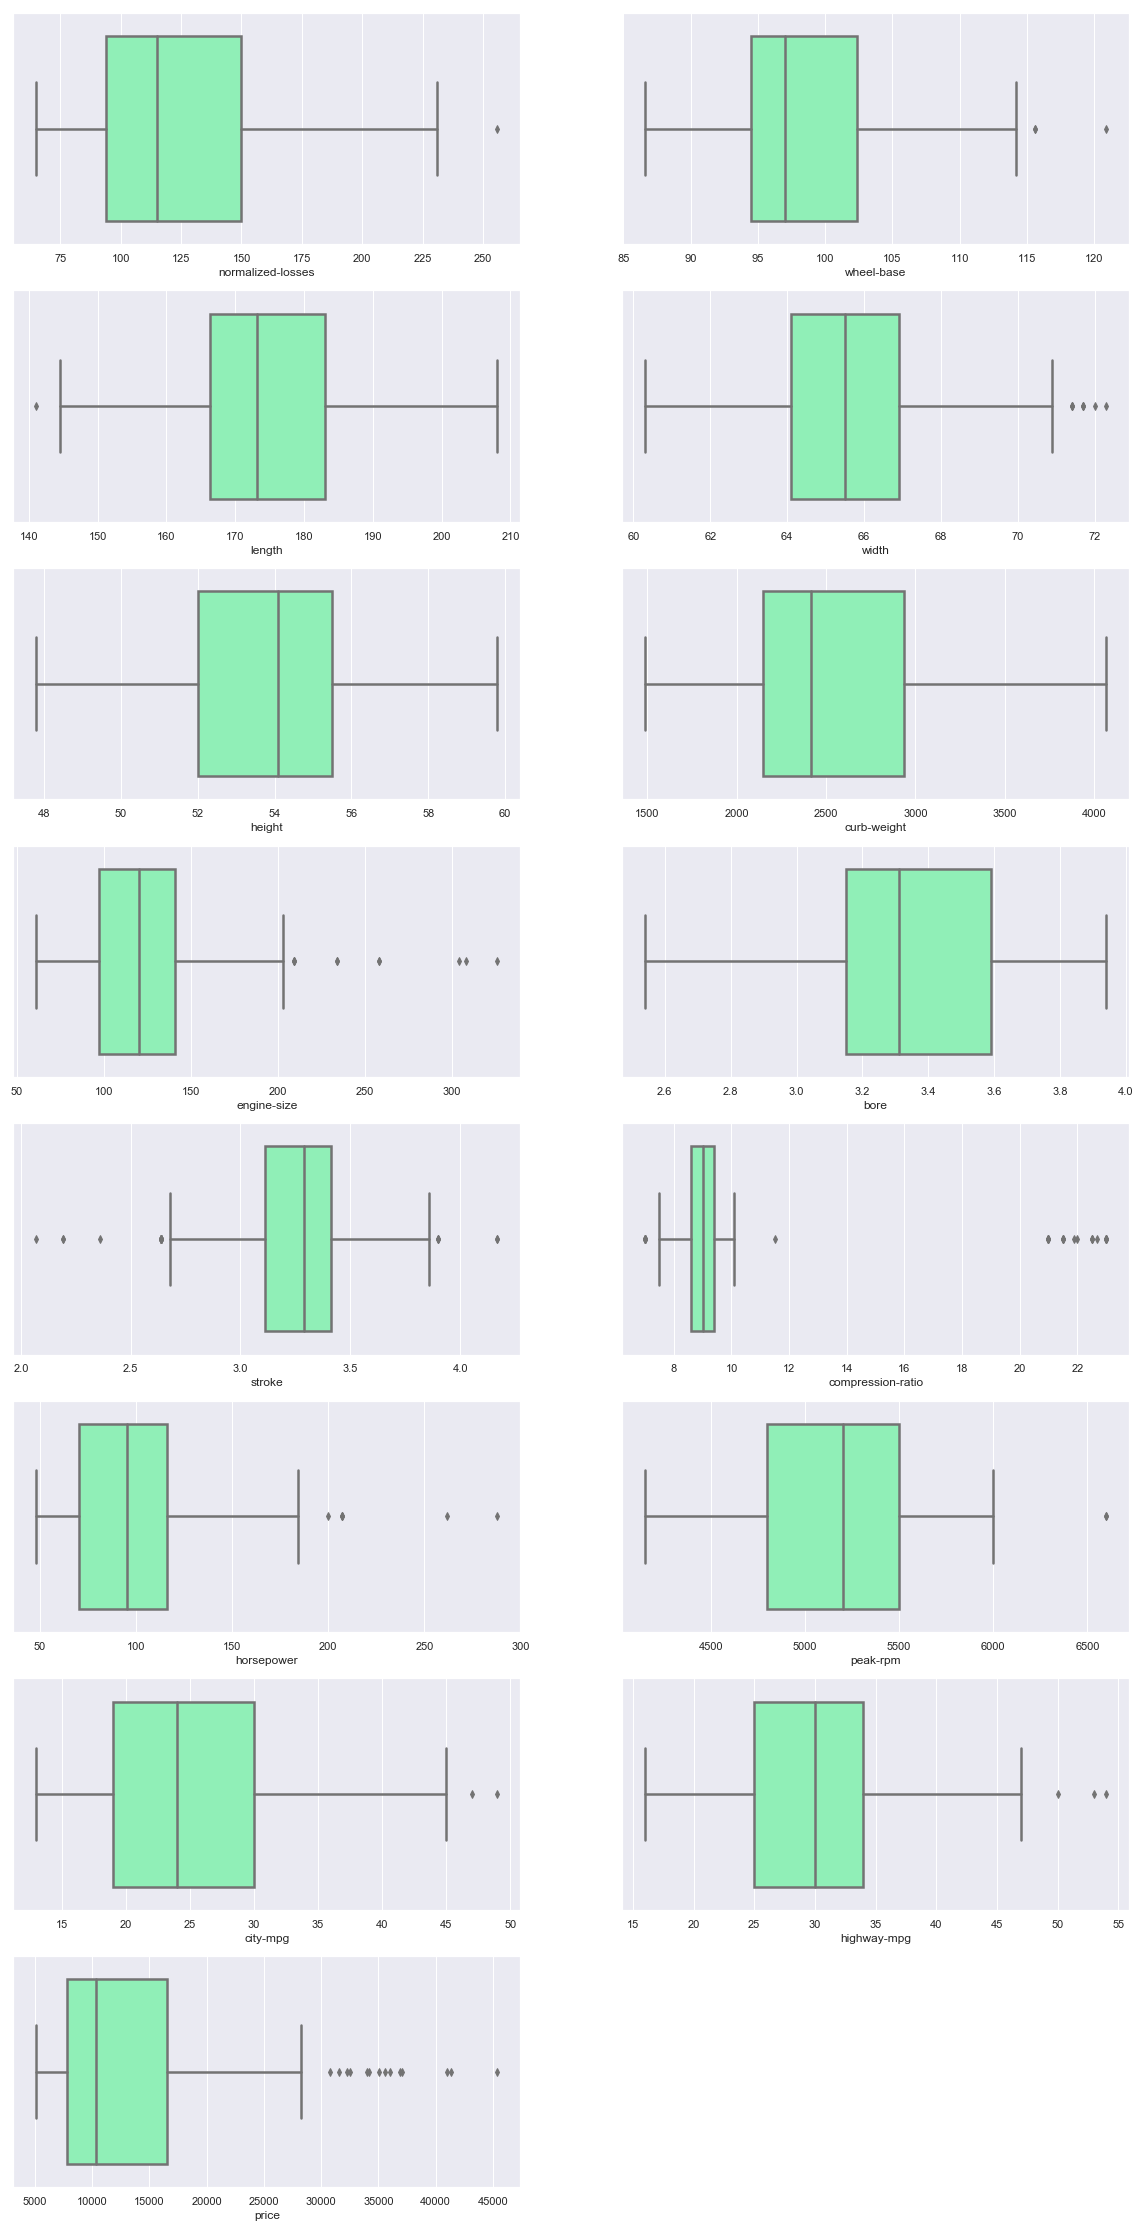

In [16]:
plot_all_num_boxplots(num_df)

TODO:
 - ~~Correlation heatmap~~
 - PCA 

## Correlation heatmap

A good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap. White means positive, Black means negative. The stronger the color, the larger the correlation magnitude.

In [17]:
def correlation_heatmap(corr):
    ax = sns.heatmap(corr)

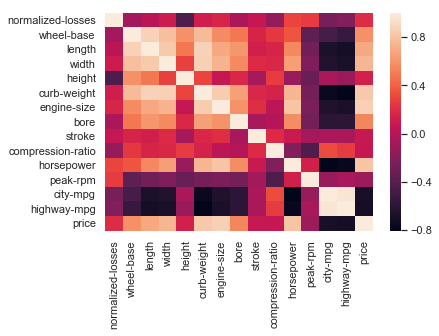

In [18]:
num_corr = num_df.corr()
correlation_heatmap(num_corr)

Looking at this heatmap we can say, for instance, that **the city-mpg of a vehicle does not depend on his height whereas it slightly affects, negatively, the highway-mpg**.

You can keep watching and taking your own conclusions. The most important thing is to become familiar with the data. If you're about to work in a model to predict the highway-mpg, you would had probably get rid of the height, but now you know that it actually affects, thanks to the heat map.

## Principal Component Analysis

The aim of PCA is to, given P variables, use a linear combination of them to create a new representation. Then, we'll be reducing the dimension of the problem.

To do so, we have to make sure that all the variables are standardized to avoid that bigger numerical values would bias the PCA by giving them more importance.

### Standardize the Data

Python's sckit learn implementation of PCA [does not apply standarization](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to the data so we have to do it by ourselves.

In [19]:
features = num_df.columns
x = num_df.loc[:, features].values
# Replace nan for -1 ----> ESTO ES UNA DECISION QUE PUEDE AFECTAR AL RESULTADO FINAL Y DEBES DE TENERLA EN CUENTA
#                    ----> TIENES VARIAS OPCIONES, COMO DIJIMOS ARRIBA: ELIMINAR LAS ROWS CON NA'S,
#                    ----> PONER A -1, A 0, A 1, A MI PENE... LA CUESTION ES QUE AFECTARÁ AL RESULTADO FINAL
#                    ----> Y LO HAS DE TENER EN CUENTA
nan_values = np.where(np.isnan(x))
x[nan_values] = -1
x = StandardScaler().fit_transform(x)
sc_num_df = pd.DataFrame(data = x, columns = features)

In [20]:
sc_num_df.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,-1.682745,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.342056,-0.738699,-0.288349,0.190657,-0.108735,-0.646553,-0.546059,0.067697
1,-1.682745,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.342056,-0.738699,-0.288349,0.190657,-0.108735,-0.646553,-0.546059,0.440556
2,-1.682745,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-0.860376,0.446483,-0.288349,1.245675,-0.108735,-0.953012,-0.691627,0.440556
3,1.138931,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.084122,0.341467,-0.035973,-0.030160,0.612739,-0.186865,-0.109354,0.124153
4,1.138931,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.084122,0.341467,-0.540725,0.288798,0.612739,-1.106241,-1.273900,0.558431


### PCA Projection

In order to choose the number of principal components, you can proceed in various ways. One of them is to
create **n_features - 1 principal components** and choose the N principal components that explain about the 70% of the variance and, in the case of standardized data, that the associated eigenvectors were greater that 1 [[Alfonso Garcia Pérez]](https://www.amazon.es/M%C3%A9todos-avanzados-estad%C3%ADstica-aplicada-PERMANENTE/dp/843625144X). This is should be verified by plotting the **scree diagram**. Furthermore, you can plot the line of cumulative_explained_variance, or without accumulate, and as the **elbow method** says choose the number that lies in the elbow drawn by the line.

In this case, scikit-learn also gives an approach to automatically calculate the number of principal components. You can do both, manually and the method given by scikit-learn, to compare and decide.

In [21]:
def plot_explained_variance(pca, cumm=False):
    data = pca.explained_variance_ratio_
    if cumm:
        data = np.cumsum(data)
    sns.lineplot(data=data, marker='o', color='k')
    plt.xlabel('Principal component')
    plt.ylabel('Explained variance ratio')

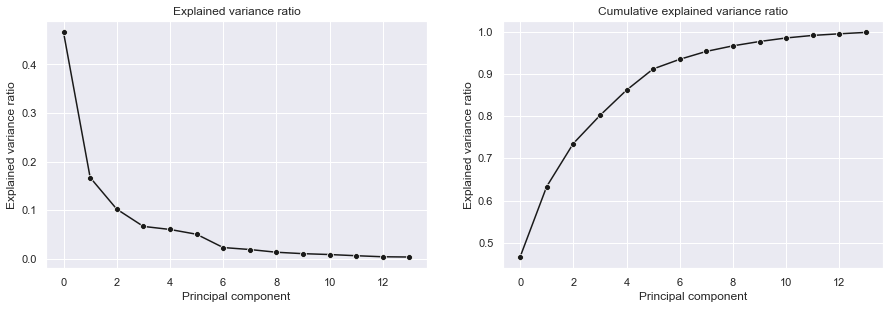

In [22]:
n_components = sc_num_df.shape[1] - 1
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(sc_num_df)
fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Explained variance ratio')
plot_explained_variance(pca)
plt.subplot(2,2,2)
plt.title('Cumulative explained variance ratio')
plot_explained_variance(pca, cumm=True)

Looking at the chart, we can see that with the two first principal components we have cover about the 74% of the variance. If we considered elbow's method, we should take until the 5th component. This is a choice you have to do, depending on the problem and the requirements you have to meet. Sometimes you are force to use just 2 components. There will be other moments in which you should probably take 6 or 7 components. But with this process you will have all the information that you need to make the decision.

## Variable reduction

\[TODO ZERGIO\]

Once we've finished with PCA, we can consider that we have reduced the dimensionality of the problem. However, we're still working with the same amount of variables, because every principal component is the lineal combination of all of the variables. To reduce this amount of variables, there's a technique proposed by [Jolliffe. 1972,1973] that stands as follows:
 * a) Choose those principal components, let's say q, whose eigenvalues are greater than 0.7.
 * b) Choose from each of the q principal components, that variable (not chosen previously) whose eigenvalue are bigger in absolute value.
 
If you don't like that way to proceed, there are many other methods to reduce the number of variables (by using trees for instance). The most accurate would be to use a few of them and reach consensus.

In [23]:
evr = pca.explained_variance_ratio_
var=np.cumsum(np.round(evr, decimals=3)*100)
print(var)

[46.6 63.3 73.5 80.1 86.1 91.1 93.4 95.3 96.6 97.6 98.4 99.  99.4 99.7]


In [42]:
pincipal_components_df = pd.DataFrame(pca.components_, columns=list(sc_num_df.columns))
pincipal_components_df.head(n_components)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,-0.117566,0.300495,0.341467,0.335472,0.121017,0.365177,0.333316,0.135642,0.056123,0.017577,0.288993,-0.056748,-0.307287,-0.319635,0.320086
1,0.149010,-0.192370,-0.103106,-0.041239,-0.350148,-0.012909,0.004737,-0.363776,-0.415605,-0.359829,0.272639,0.379677,-0.289843,-0.253087,0.067679
2,0.107296,0.272574,0.185240,0.135396,0.303499,0.060278,-0.204983,-0.511415,-0.516562,0.375193,-0.222383,-0.060081,0.038636,0.005982,-0.006176
3,-0.629656,-0.208246,-0.119141,-0.014191,-0.408303,0.032913,0.181139,-0.217883,-0.176443,0.215036,0.015824,-0.448507,0.031439,0.044196,0.126370
4,-0.469680,0.064187,0.085972,-0.142867,0.396064,-0.096062,-0.215139,0.011922,-0.107252,-0.576465,-0.188121,-0.181036,-0.207212,-0.196849,-0.203204
5,0.546565,-0.017278,0.057281,0.068796,-0.251913,0.031032,0.024804,-0.010074,0.000961,-0.220285,-0.219858,-0.692007,-0.164959,-0.134282,-0.082670
6,-0.164824,0.234769,0.153413,0.424685,-0.408226,0.051176,-0.231812,-0.047536,0.180124,0.055647,0.021090,0.137024,-0.049834,-0.045779,-0.655148
7,-0.039705,0.395362,0.040396,0.265407,-0.168505,-0.119707,0.210159,-0.195135,0.018262,-0.494992,-0.173404,0.070153,0.391634,0.360161,0.285723
8,0.057994,-0.099733,-0.013424,0.196662,0.157150,0.052555,0.136154,0.360526,-0.541668,-0.117930,0.447557,-0.167413,0.218018,0.302805,-0.311431
9,0.059228,-0.147295,-0.231889,0.092990,0.364386,0.100518,0.281711,-0.582056,0.392237,-0.082197,0.314116,-0.131238,0.024298,0.075168,-0.261929


In [43]:
pincipal_components_df.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,-0.117566,0.300495,0.341467,0.335472,0.121017,0.365177,0.333316,0.135642,0.056123,0.017577,0.288993,-0.056748,-0.307287,-0.319635,0.320086
1,0.149010,-0.192370,-0.103106,-0.041239,-0.350148,-0.012909,0.004737,-0.363776,-0.415605,-0.359829,0.272639,0.379677,-0.289843,-0.253087,0.067679
2,0.107296,0.272574,0.185240,0.135396,0.303499,0.060278,-0.204983,-0.511415,-0.516562,0.375193,-0.222383,-0.060081,0.038636,0.005982,-0.006176
